# Spotify x Billboard Five Year Analysis Project: Exploratory Analysis

## Import packages 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import fontTools
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

### Set Display Options

#### Set to display all columns (max 500)

In [2]:
pd.set_option('display.max_columns', 500)

#### Disable display window scrolling for notebook

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

## Import dataframes

### Import All Chart Tracks Table

In [4]:
df1=pd.read_csv("../data/AllChartAlbumTracksRecoded.csv")

### Import Master Chart Table

In [5]:
df2=pd.read_csv("../data/MasterChartTableRecoded.csv")
df2.tail()

,Unnamed: 0,playlist_id,playlist_name,position,album_name,album_id,album_release_date,album_artists,album_artists_ids,album_artists_genres,album_artists_popularity,album_artists_followers,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_artist
988,988,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,195,+,0W5GGnapMz0VwemQvJDqa7,2011-09-09,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],"[['pop', 'uk pop']]",[97],[90231430],The A Team,1VdZ0vKfR5jneCmWIUAMxK,78,['Ed Sheeran'],['6eUKZXaKkcviH0Ku9w2n3V'],"[['pop', 'uk pop']]",[97],False,[90231430],0.642,0.289,9,-9.918,1,0.6690,0.0,0.1800,0.407,84.996,258373,4,Ed Sheeran
989,989,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,196,Sing It Now: Songs Of Faith & Hope,3zSyGvLk5FcLhC3BtbKr9z,2017-02-03,['Reba McEntire'],['02rd0anEWfMtF7iMku9uor'],"[['contemporary country', 'country', 'country ...",[67],[1535356],Back To God,3W29VxuZ2AZNkPPJwVmD3a,34,['Reba McEntire'],['02rd0anEWfMtF7iMku9uor'],"[['contemporary country', 'country', 'country ...",[67],False,[1535356],0.501,0.674,6,-5.666,1,0.0390,2.92e-06,0.0783,0.359,147.931,289840,4,Reba McEntire
990,990,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,197,BEYONCÉ [Platinum Edition],2UJwKSBUz6rtW4QLK74kQu,2014-11-24,['Beyoncé'],['6vWDO969PvNqNYHIOW5v0m'],"[['dance pop', 'pop', 'r&b']]",[87],[29904174],7/11,02M6vucOvmRfMxTXDUwRXu,73,['Beyoncé'],['6vWDO969PvNqNYHIOW5v0m'],"[['dance pop', 'pop', 'r&b']]",[87],False,[29904174],0.747,0.705,9,-5.137,0,0.0128,0.0,0.1260,0.560,136.024,213507,4,Beyoncé
991,991,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,199,The Breaker,2aQOzEjLzPkffXDwREXdAh,2017-02-24,['Little Big Town'],['3CygdxquGHurS7f9LjNLkv'],"[['contemporary country', 'country', 'country ...",[70],[2309982],Better Man,23TxRN09aR1RB0G0tFoT0b,68,['Little Big Town'],['3CygdxquGHurS7f9LjNLkv'],"[['contemporary country', 'country', 'country ...",[70],False,[2309982],0.514,0.836,5,-3.663,1,0.1120,0.0,0.0878,0.501,143.888,263120,4,Little Big Town
992,992,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,Heart Break,4WZZDzGqjvw4bRwrp56U24,2017-06-09,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"[['contemporary country', 'country', 'country ...",[74],[3424979],Heart Break,3YZ5TNGA10oTLaADq4zuNV,51,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"[['contemporary country', 'country', 'country ...",[74],False,[3424979],0.549,0.883,7,-5.525,1,0.0423,1.31e-05,0.3230,0.668,83.994,188293,4,Lady A


In [6]:
position_int = list(df2['position'])
df2['chart_position'] = position_int

In [7]:
df3 = df2[["playlist_id", "playlist_name", "chart_position", "album_release_date", "album_id", 'album_artist']]
df3.tail()

,playlist_id,playlist_name,chart_position,album_release_date,album_id,album_artist
988,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,195,2011-09-09,0W5GGnapMz0VwemQvJDqa7,Ed Sheeran
989,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,196,2017-02-03,3zSyGvLk5FcLhC3BtbKr9z,Reba McEntire
990,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,197,2014-11-24,2UJwKSBUz6rtW4QLK74kQu,Beyoncé
991,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,199,2017-02-24,2aQOzEjLzPkffXDwREXdAh,Little Big Town
992,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A


### Join Master Chart and All Track Tables on the Album ID

In [9]:
df4 = pd.merge(df3, df1, on='album_id')
df4

,playlist_id,playlist_name,chart_position,album_release_date,album_id,album_artist,Unnamed: 0,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,album_name,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_artist,track_artist_id,track_artist_popularity,track_artist_followers,track_artists_genres_consolidate,main_genre,Misc,Rock,Pop,Hip-hop,Edm,Latin,Indie,Christian,Country,Soul,Metal,Jazz,Folk,Funk,Easy_listening,R&B,Reggae,Show_tunes
0,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,0,Sand In My Boots,4qeMbs55QlONyrE9YBMA93,42,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.354,0.540,3.0,-6.625,1.0,0.58700,0.000000,0.1120,0.416,69.970,202133.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,1,Wasted On You,4xv9BDq764NSKG3geku9X2,43,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.505,0.658,11.0,-5.240,0.0,0.37100,0.001360,0.1210,0.255,196.002,178520.0,3.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,2,Somebody’s Problem,7cWMnSxmQfKFsIIoRWifbb,36,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.658,0.539,5.0,-7.674,1.0,0.66500,0.000000,0.1230,0.622,136.959,161773.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,3,More Surprised Than Me,6Mn2GFiNNadK0G2ZXRK1fd,36,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.488,0.748,6.0,-6.049,1.0,0.24400,0.000000,0.1240,0.431,84.938,157440.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,4,865,3lb2f27695Iuyd82khwU9k,39,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.454,0.586,8.0,-5.254,1.0,0.72900,0.000000,0.1010,0.366,87.891,190680.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,8988,Big Love In A Small Town,1VwuDXLQdyTWvieBIPWkNt,37,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d...",[74],False,[3424979],Heart Break,0.524,0.523,1.0,-5.150,1.0,0.64500,0.000000,0.1010,0.313,144.012,226013.0,4.0,Lady A,32WkQRZEVKSzVAAYqukAEA,74,3424979,"['Country', 'Country', 'Country', 'Pop', 'Coun...",Country,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16501,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,8989,The Stars,2gFkkpMs7rakuCCi9UepP0,37,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d...",[74],False,[3424979],Heart Break,0.576,0.766,1.0,-4.594,1.0,0.26300,0.000004,0.1020,0.407,143.029,202347.0,4.0,Lady A,32WkQRZEVKSzVAAYqukAEA,74,3424979,"['Country', 'Country', 'Country', 'Po

In [10]:
df4 = df4.drop("Unnamed: 0", axis=1)
df4

,playlist_id,playlist_name,chart_position,album_release_date,album_id,album_artist,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,album_name,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_artist,track_artist_id,track_artist_popularity,track_artist_followers,track_artists_genres_consolidate,main_genre,Misc,Rock,Pop,Hip-hop,Edm,Latin,Indie,Christian,Country,Soul,Metal,Jazz,Folk,Funk,Easy_listening,R&B,Reggae,Show_tunes
0,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Sand In My Boots,4qeMbs55QlONyrE9YBMA93,42,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.354,0.540,3.0,-6.625,1.0,0.58700,0.000000,0.1120,0.416,69.970,202133.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Wasted On You,4xv9BDq764NSKG3geku9X2,43,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.505,0.658,11.0,-5.240,0.0,0.37100,0.001360,0.1210,0.255,196.002,178520.0,3.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,Somebody’s Problem,7cWMnSxmQfKFsIIoRWifbb,36,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.658,0.539,5.0,-7.674,1.0,0.66500,0.000000,0.1230,0.622,136.959,161773.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,More Surprised Than Me,6Mn2GFiNNadK0G2ZXRK1fd,36,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.488,0.748,6.0,-6.049,1.0,0.24400,0.000000,0.1240,0.431,84.938,157440.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,1,2021-01-08,1qW1C4kDOXnrly22daHbxz,Morgan Wallen,865,3lb2f27695Iuyd82khwU9k,39,['Morgan Wallen'],['4oUHIQIBe0LHzYfvXNW4QM'],['contemporary country'],[87],False,[2705213],Dangerous: The Double Album,0.454,0.586,8.0,-5.254,1.0,0.72900,0.000000,0.1010,0.366,87.891,190680.0,4.0,Morgan Wallen,4oUHIQIBe0LHzYfvXNW4QM,87,2705213,['Country'],Country,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,Big Love In A Small Town,1VwuDXLQdyTWvieBIPWkNt,37,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d...",[74],False,[3424979],Heart Break,0.524,0.523,1.0,-5.150,1.0,0.64500,0.000000,0.1010,0.313,144.012,226013.0,4.0,Lady A,32WkQRZEVKSzVAAYqukAEA,74,3424979,"['Country', 'Country', 'Country', 'Pop', 'Coun...",Country,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16501,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,200,2017-06-09,4WZZDzGqjvw4bRwrp56U24,Lady A,The Stars,2gFkkpMs7rakuCCi9UepP0,37,['Lady A'],['32WkQRZEVKSzVAAYqukAEA'],"['contemporary country', 'country', 'country d...",[74],False,[3424979],Heart Break,0.576,0.766,1.0,-4.594,1.0,0.26300,0.000004,0.1020,0.407,143.029,202347.0,4.0,Lady A,32WkQRZEVKSzVAAYqukAEA,74,3424979,"['Country', 'Country', 'Country', 'Pop', 'Coun...",Country,0,0,1,0,0,0,0

In [63]:
df4.to_csv('../data/AllTracksAndChartsJoined.csv')

#### Select five most popular songs for each album on chart

In [11]:
df5 = df4.sort_values('track_popularity', ascending = False).groupby(['playlist_name', 'album_id']).head(5)
df5

,playlist_id,playlist_name,chart_position,album_release_date,album_id,album_artist,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,album_name,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_artist,track_artist_id,track_artist_popularity,track_artist_followers,track_artists_genres_consolidate,main_genre,Misc,Rock,Pop,Hip-hop,Edm,Latin,Indie,Christian,Country,Soul,Metal,Jazz,Folk,Funk,Easy_listening,R&B,Reggae,Show_tunes
8239,0n3V7u9sMRV7sCDMhWxDtL,Billboard 200 Top Albums 2019,191,1994-11-01,61ulfFSmmxMhc2wCdmdMkN,Mariah Carey,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,100,['Mariah Carey'],['4iHNK0tOyZPYnBU7nGAgpQ'],"['dance pop', 'pop', 'urban contemporary']",[90],False,[7336768],Merry Christmas,0.336,0.627,7.0,-7.463,1.0,0.1640,0.000000,0.0708,0.350,150.273,241107.0,4.0,Mariah Carey,4iHNK0tOyZPYnBU7nGAgpQ,90,7336768,"['Pop', 'Pop', 'R&B']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8229,1EEazdcjH0keT4sttGvH8c,Billboard 200 Top Albums 2020,168,1994-11-01,61ulfFSmmxMhc2wCdmdMkN,Mariah Carey,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,100,['Mariah Carey'],['4iHNK0tOyZPYnBU7nGAgpQ'],"['dance pop', 'pop', 'urban contemporary']",[90],False,[7336768],Merry Christmas,0.336,0.627,7.0,-7.463,1.0,0.1640,0.000000,0.0708,0.350,150.273,241107.0,4.0,Mariah Carey,4iHNK0tOyZPYnBU7nGAgpQ,90,7336768,"['Pop', 'Pop', 'R&B']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8219,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,178,1994-11-01,61ulfFSmmxMhc2wCdmdMkN,Mariah Carey,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,100,['Mariah Carey'],['4iHNK0tOyZPYnBU7nGAgpQ'],"['dance pop', 'pop', 'urban contemporary']",[90],False,[7336768],Merry Christmas,0.336,0.627,7.0,-7.463,1.0,0.1640,0.000000,0.0708,0.350,150.273,241107.0,4.0,Mariah Carey,4iHNK0tOyZPYnBU7nGAgpQ,90,7336768,"['Pop', 'Pop', 'R&B']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
501,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,20,2021-06-25,1nAQbHeOWTfQzbOoFrvndW,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,96,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],"['dance pop', 'pop']",[95],True,[13925967],Planet Her,0.824,0.764,5.0,-4.175,0.0,0.0888,0.002940,0.1170,0.881,107.998,172627.0,4.0,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5,95,13925967,"['Pop', 'Pop']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,2,2021-05-21,6s84u2TUpR3wdUv4NgKA2j,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,96,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],['pop'],[92],True,[12088661],SOUR,0.563,0.664,9.0,-5.044,1.0,0.3350,0.000000,0.0849,0.688,166.928,178147.0,4.0,Olivia Rodrigo,1McMsnEElThX1knmY4oliG,92,12088661,['Pop'],Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15144,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,43,2017-04-21,3dpnbhZjAfAl4W0lUJYNa8,Fleetwood Mac,Father And Son,2oG0OvG8YHbyYhRiaxVzBW,0,['Yusuf / Cat Stevens'],['0LyfQWJT6nXafLPZqxe9Of'],[],[0],False,[1422955],Vol. 2 Guardians of the Galaxy: Awesome Mix Vo...,0.501,0.350,7.0,-10.757,1.0,0.6200,0.000081,0.1070,0.410,135.410,219000.0,4.0,Yusuf / Cat Stevens,0LyfQWJT6nXafLPZqxe9Of,0,1422955,[],No Genre Assigned,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5934,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,122,2014-11-07,4YjC2XwME8RP4rmSIeGK7I,Zac Brown Band,Chicken Fried - Greatest Hits Version,1vq4dEytAKH7vNOxv8sGt0,0,['Zac Brown Band'],['6yJCxee7QumYr820xdIsjo'],"['contemporary country', 'country', 'country r...",[75],False,[2913056],Greatest Hits So Far...,0.564,0.718,6.0,-4.235,1.0,0.6470,0.000000,0.0980,0.800,169.848,236907.0,4.0,Zac Brown Band,6yJCxee7QumYr820xdIsjo,75,2913056,"['Country', 'Country', 'Co

In [12]:
df5.to_csv('../data/MostPopularAlbumTracksAllChartsJoined.csv')

## Explorations

### Preliminary Questions

#### Shape of the dataframe:

In [13]:
print(f"\nDataframe shape: {df4.shape}\n") 


Dataframe shape: (16505, 52)



#### Most popular song in dataset:

In [14]:
np.max(df4['track_popularity'])

100

In [15]:
df4.loc[df4['track_popularity'] == 100]

,playlist_id,playlist_name,chart_position,album_release_date,album_id,album_artist,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,album_name,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_artist,track_artist_id,track_artist_popularity,track_artist_followers,track_artists_genres_consolidate,main_genre,Misc,Rock,Pop,Hip-hop,Edm,Latin,Indie,Christian,Country,Soul,Metal,Jazz,Folk,Funk,Easy_listening,R&B,Reggae,Show_tunes
8219,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,178,1994-11-01,61ulfFSmmxMhc2wCdmdMkN,Mariah Carey,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,100,['Mariah Carey'],['4iHNK0tOyZPYnBU7nGAgpQ'],"['dance pop', 'pop', 'urban contemporary']",[90],False,[7336768],Merry Christmas,0.336,0.627,7.0,-7.463,1.0,0.164,0.0,0.0708,0.35,150.273,241107.0,4.0,Mariah Carey,4iHNK0tOyZPYnBU7nGAgpQ,90,7336768,"['Pop', 'Pop', 'R&B']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8229,1EEazdcjH0keT4sttGvH8c,Billboard 200 Top Albums 2020,168,1994-11-01,61ulfFSmmxMhc2wCdmdMkN,Mariah Carey,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,100,['Mariah Carey'],['4iHNK0tOyZPYnBU7nGAgpQ'],"['dance pop', 'pop', 'urban contemporary']",[90],False,[7336768],Merry Christmas,0.336,0.627,7.0,-7.463,1.0,0.164,0.0,0.0708,0.35,150.273,241107.0,4.0,Mariah Carey,4iHNK0tOyZPYnBU7nGAgpQ,90,7336768,"['Pop', 'Pop', 'R&B']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8239,0n3V7u9sMRV7sCDMhWxDtL,Billboard 200 Top Albums 2019,191,1994-11-01,61ulfFSmmxMhc2wCdmdMkN,Mariah Carey,All I Want for Christmas Is You,0bYg9bo50gSsH3LtXe2SQn,100,['Mariah Carey'],['4iHNK0tOyZPYnBU7nGAgpQ'],"['dance pop', 'pop', 'urban contemporary']",[90],False,[7336768],Merry Christmas,0.336,0.627,7.0,-7.463,1.0,0.164,0.0,0.0708,0.35,150.273,241107.0,4.0,Mariah Carey,4iHNK0tOyZPYnBU7nGAgpQ,90,7336768,"['Pop', 'Pop', 'R&B']",Pop,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
print(f"Most popular song: {set(df4[df4['track_popularity'] == 100]['track_name'].tolist())}" f" by {set(df4[df4['track_popularity'] == 100]['track_artist'].tolist())}\n")

Most popular song: {'All I Want for Christmas Is You'} by {'Mariah Carey'}



#### Scatter plot of track popularity compared to valence

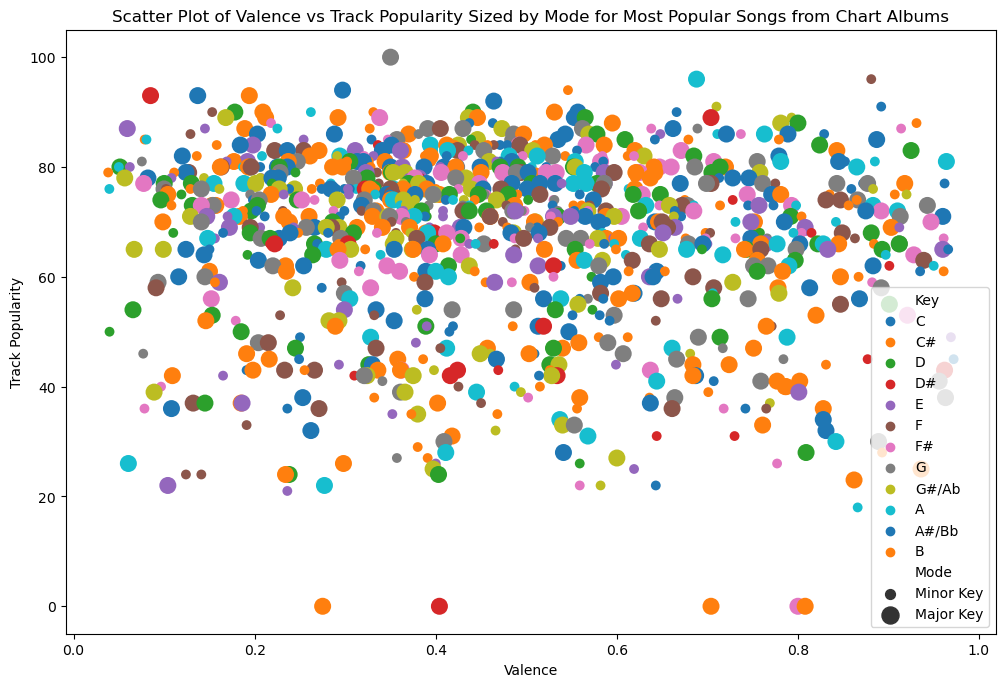

In [21]:
sns.scatterplot(x="valence", y="track_popularity",
                hue="key",
                size="mode",
                palette="tab10",
                sizes=(150, 50), linewidth=0,
                data= df5[df5['playlist_name'] == 'Billboard 200 Top Albums 2021'])
plt.title('Scatter Plot of Valence vs Track Popularity Sized by Mode for Most Popular Songs from Chart Albums')
plt.xlabel('Valence')
plt.ylabel('Track Popularity')
vpm_plot_key=plt.legend()
vpm_plot_key.get_texts()[0].set_text('Key')
vpm_plot_key.get_texts()[1].set_text('C')
vpm_plot_key.get_texts()[2].set_text('C#')
vpm_plot_key.get_texts()[3].set_text('D')
vpm_plot_key.get_texts()[4].set_text('D#')
vpm_plot_key.get_texts()[5].set_text('E')
vpm_plot_key.get_texts()[6].set_text('F')
vpm_plot_key.get_texts()[7].set_text('F#')
vpm_plot_key.get_texts()[8].set_text('G')
vpm_plot_key.get_texts()[9].set_text('G#/Ab')
vpm_plot_key.get_texts()[10].set_text('A')
vpm_plot_key.get_texts()[11].set_text('A#/Bb')
vpm_plot_key.get_texts()[12].set_text('B')
vpm_plot_key.get_texts()[13].set_text('Mode')
vpm_plot_key.get_texts()[14].set_text('Minor Key')
vpm_plot_key.get_texts()[15].set_text('Major Key')
plt.savefig('../viz/pyplots/ValencePopularityModeScatterPlot.png')

#### Average loudness for all chart years together: 

In [22]:
print(f"Average loudness for all years: {np.mean(df4['loudness'])} dB\n")

Average loudness for all years: -7.482124091129442 dB



#### Average loudness for each chart year: 

In [23]:
print(f"Average loudness in 2017: {np.mean(df4[df4['playlist_name'] == 'Billboard 200 Top Albums 2017']['loudness'])} dB")
print(f"Average loudness in 2018: {np.mean(df4[df4['playlist_name'] == 'Billboard 200 Top Albums 2018']['loudness'])} dB")
print(f"Average loudness in 2019: {np.mean(df4[df4['playlist_name'] == 'Billboard 200 Top Albums 2019']['loudness'])} dB")
print(f"Average loudness in 2020: {np.mean(df4[df4['playlist_name'] == 'Billboard 200 Top Albums 2020']['loudness'])} dB")
print(f"Average loudness in 2021: {np.mean(df4[df4['playlist_name'] == 'Billboard 200 Top Albums 2021']['loudness'])} dB")

Average loudness in 2017: -7.362742773627801 dB
Average loudness in 2018: -7.208551659361308 dB
Average loudness in 2019: -7.458067571555021 dB
Average loudness in 2020: -7.681900204858057 dB
Average loudness in 2021: -7.669060729927005 dB


In [24]:
loudness_frame = df4[['track_id', 'playlist_name', 'main_genre', 'loudness', 'energy']]
average_loudness = list(loudness_frame.groupby('playlist_name')['loudness'].mean())
average_loudness

[-7.362742773627801,
 -7.208551659361308,
 -7.458067571555021,
 -7.681900204858057,
 -7.669060729927005]

#### Chart of change in average loudness over time

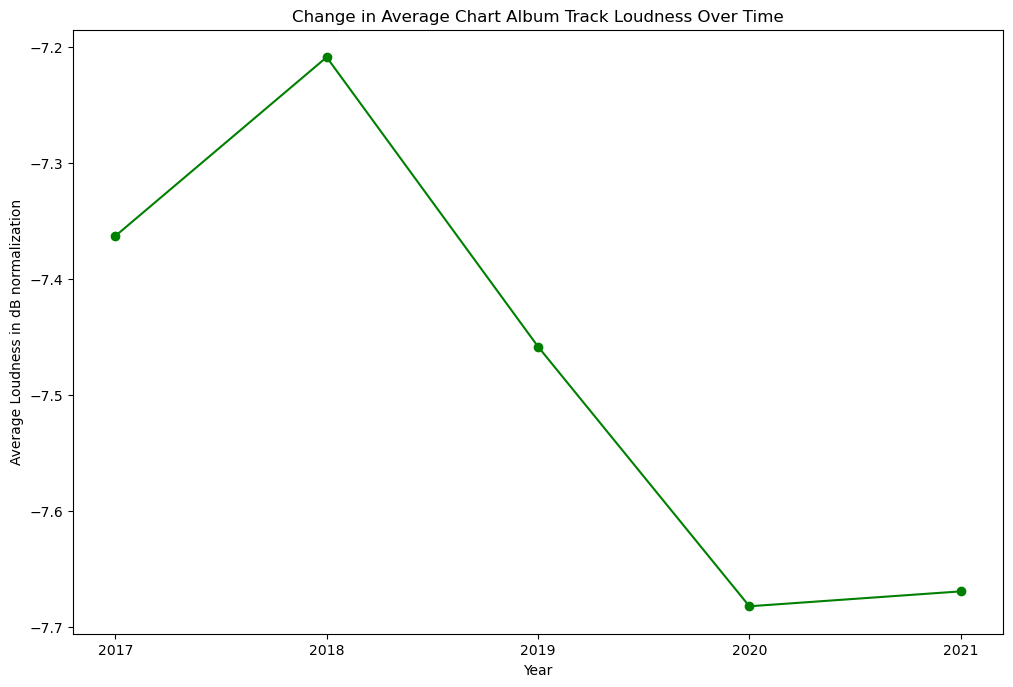

<Figure size 1200x800 with 0 Axes>

In [25]:
years = [2017, 2018, 2019, 2020, 2021]
plt.plot(years, average_loudness, color='green', marker='o', linestyle='solid')
plt.title("Change in Average Chart Album Track Loudness Over Time")
plt.xlabel("Year")
plt.ylabel("Average Loudness in dB normalization")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.show()
plt.savefig('../viz/pyplots/LoudnessMeansOverTimeLineChart.png')

#### Error bar of average loudness by genre

In [26]:
# create new table
all_genre_features_table = df4[['track_name', 'track_id', 'main_genre', 'loudness', 'valence']]
# grouping loudness by genre
genre_loudness = all_genre_features_table.groupby('main_genre')['loudness'].aggregate(['min', np.mean, 'max'])
# merge
genre_loudness_error = pd.merge(all_genre_features_table, genre_loudness, how='left', left_on='main_genre', right_on = 'main_genre', copy=False).fillna(0)

In [27]:
genre_loudness_error

,track_name,track_id,main_genre,loudness,valence,min,mean,max
0,Sand In My Boots,4qeMbs55QlONyrE9YBMA93,Country,-6.625,0.416,-25.801,-6.467708,-0.716
1,Wasted On You,4xv9BDq764NSKG3geku9X2,Country,-5.240,0.255,-25.801,-6.467708,-0.716
2,Somebody’s Problem,7cWMnSxmQfKFsIIoRWifbb,Country,-7.674,0.622,-25.801,-6.467708,-0.716
3,More Surprised Than Me,6Mn2GFiNNadK0G2ZXRK1fd,Country,-6.049,0.431,-25.801,-6.467708,-0.716
4,865,3lb2f27695Iuyd82khwU9k,Country,-5.254,0.366,-25.801,-6.467708,-0.716
...,...,...,...,...,...,...,...,...
16500,Big Love In A Small Town,1VwuDXLQdyTWvieBIPWkNt,Country,-5.150,0.313,-25.801,-6.467708,-0.716
16501,The Stars,2gFkkpMs7rakuCCi9UepP0,Country,-4.594,0.407,-25.801,-6.467708,-0.716
16502,Teenage Heart,7G2BnhS46nEiPucLNvE0G3,Country,-6.227,0.505,-25.801,-6.467708,-0.716
16503,Home,32zF5eXrb8QrUu5qNdYmIO,Country,-7.797,0.567,-25.801,-6.467708,-0.716


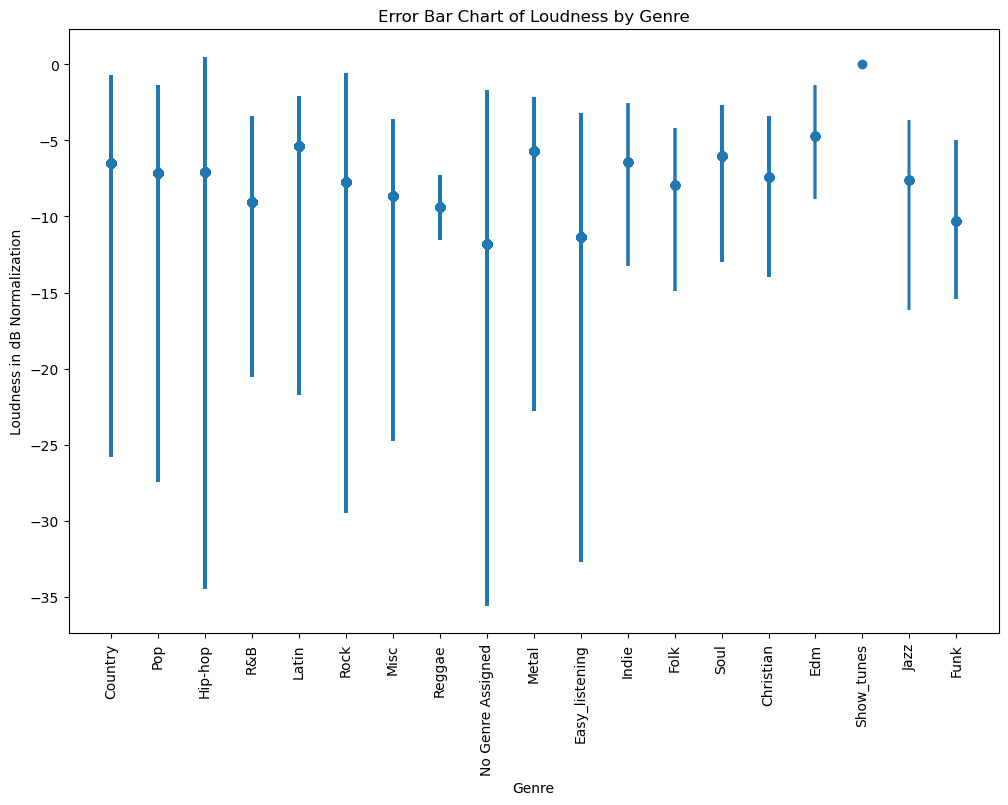

<Figure size 1200x800 with 0 Axes>

In [28]:
# Plot
plt.errorbar(genre_loudness_error["main_genre"],genre_loudness_error["mean"], [genre_loudness_error["mean"] - genre_loudness_error['min'],genre_loudness_error['max']-genre_loudness_error["mean"]], linestyle='None',marker='o')
plt.xticks(rotation='vertical')
plt.title('Error Bar Chart of Loudness by Genre')
plt.xlabel('Genre')
plt.ylabel('Loudness in dB Normalization')
plt.show()
plt.savefig('../viz/pyplots/LoudnessbyGenreErrorChart.png')

#### Average valence for most popular album tracks all chart years together: 

In [29]:
print(f"Average valence for all years: {np.mean(df5['valence'])} dB\n")

Average valence for all years: 0.46879270308405546 dB



#### Error bar of average valence by genre

In [30]:
# create new table
all_genre_features_table = df4[['track_name', 'track_id', 'main_genre', 'loudness', 'valence']]
# grouping loudness by genre
genre_valence = all_genre_features_table.groupby('main_genre')['valence'].aggregate(['min', np.mean, 'max'])
# merge
genre_valence_error = pd.merge(all_genre_features_table, genre_valence, how='left', left_on='main_genre', right_on = 'main_genre', copy=False).fillna(0)

In [31]:
genre_valence_error

,track_name,track_id,main_genre,loudness,valence,min,mean,max
0,Sand In My Boots,4qeMbs55QlONyrE9YBMA93,Country,-6.625,0.416,0.0,0.520515,0.978
1,Wasted On You,4xv9BDq764NSKG3geku9X2,Country,-5.240,0.255,0.0,0.520515,0.978
2,Somebody’s Problem,7cWMnSxmQfKFsIIoRWifbb,Country,-7.674,0.622,0.0,0.520515,0.978
3,More Surprised Than Me,6Mn2GFiNNadK0G2ZXRK1fd,Country,-6.049,0.431,0.0,0.520515,0.978
4,865,3lb2f27695Iuyd82khwU9k,Country,-5.254,0.366,0.0,0.520515,0.978
...,...,...,...,...,...,...,...,...
16500,Big Love In A Small Town,1VwuDXLQdyTWvieBIPWkNt,Country,-5.150,0.313,0.0,0.520515,0.978
16501,The Stars,2gFkkpMs7rakuCCi9UepP0,Country,-4.594,0.407,0.0,0.520515,0.978
16502,Teenage Heart,7G2BnhS46nEiPucLNvE0G3,Country,-6.227,0.505,0.0,0.520515,0.978
16503,Home,32zF5eXrb8QrUu5qNdYmIO,Country,-7.797,0.567,0.0,0.520515,0.978


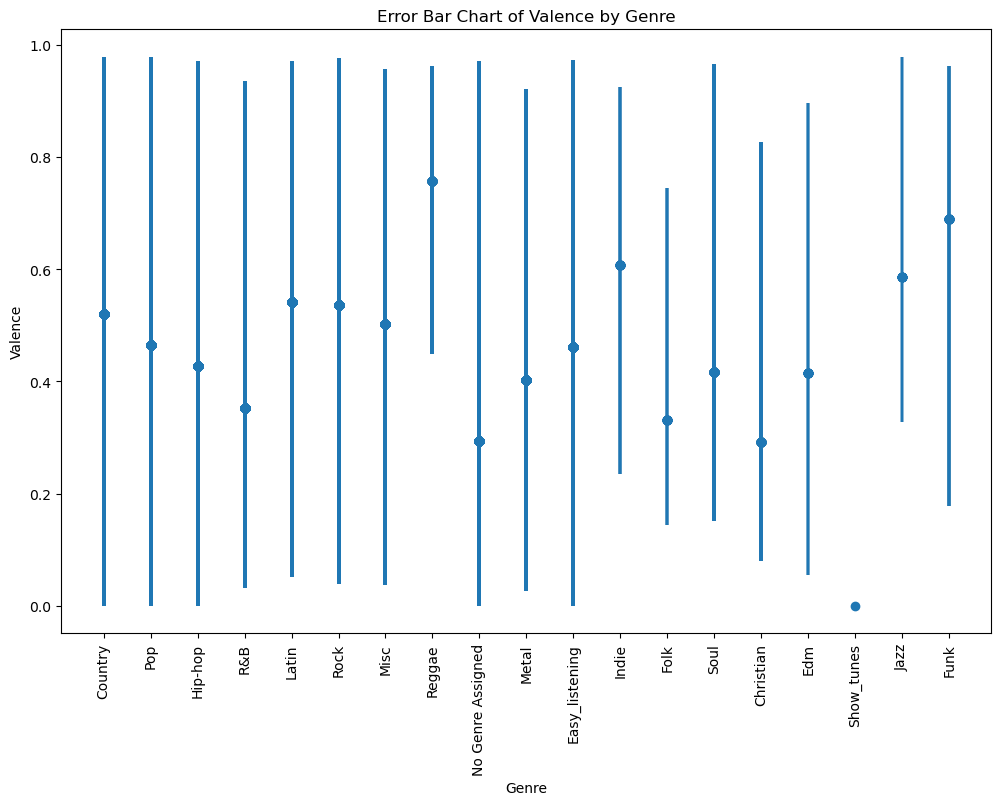

<Figure size 1200x800 with 0 Axes>

In [32]:
# Plot
plt.errorbar(genre_valence_error["main_genre"],genre_valence_error["mean"], [genre_valence_error["mean"] - genre_valence_error['min'],genre_valence_error['max'] - genre_valence_error["mean"]], linestyle='None',marker='o')
plt.xticks(rotation='vertical')
plt.title('Error Bar Chart of Valence by Genre')
plt.xlabel('Genre')
plt.ylabel('Valence')
plt.show()
plt.savefig('../viz/pyplots/ValencebyGenreErrorChart.png')

#### Count plot for songs in each major and minor key

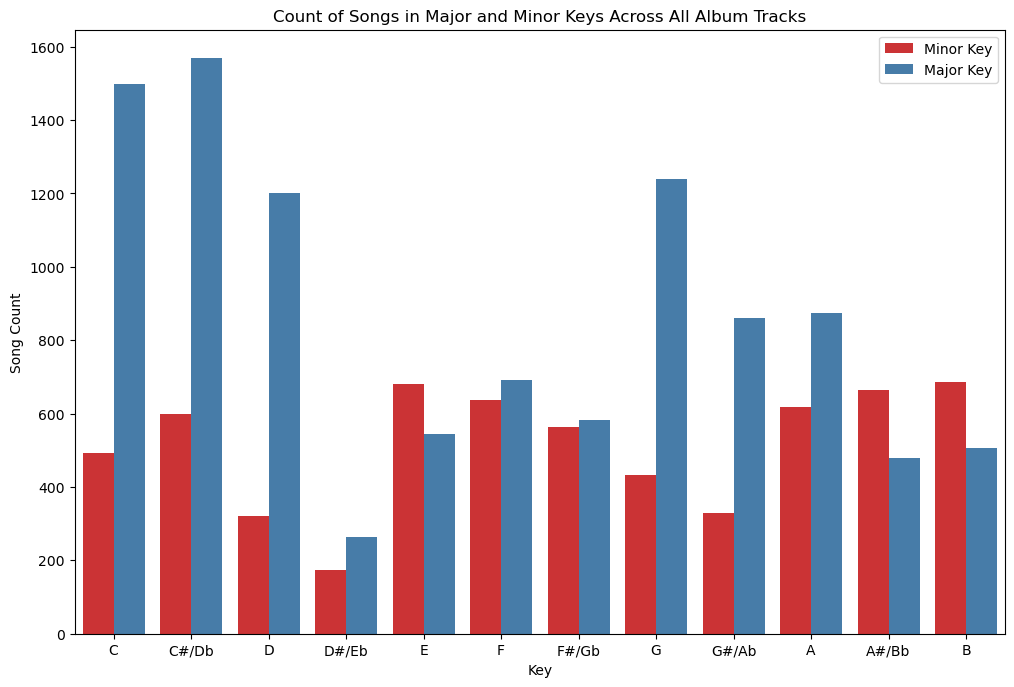

In [33]:
key_plot = sns.countplot(data=df4, x='key', hue='mode', palette = 'Set1')
plt.xlabel('Key')
plt.ylabel('Song Count')
plt.title('Count of Songs in Major and Minor Keys Across All Album Tracks')
key_plot.set_xticklabels(['C','C#/Db','D','D#/Eb','E','F','F#/Gb','G', 'G#/Ab', 'A', 'A#/Bb', 'B'])
plot_modes=plt.legend()
plot_modes.get_texts()[0].set_text('Minor Key')
plot_modes.get_texts()[1].set_text('Major Key')
plt.savefig('../viz/pyplots/KeyCountPlot.png')

#### Number of tracks with explicit lyrics

In [34]:
df4['track_explicit'].value_counts()

False    10364
True      6141
Name: track_explicit, dtype: int64

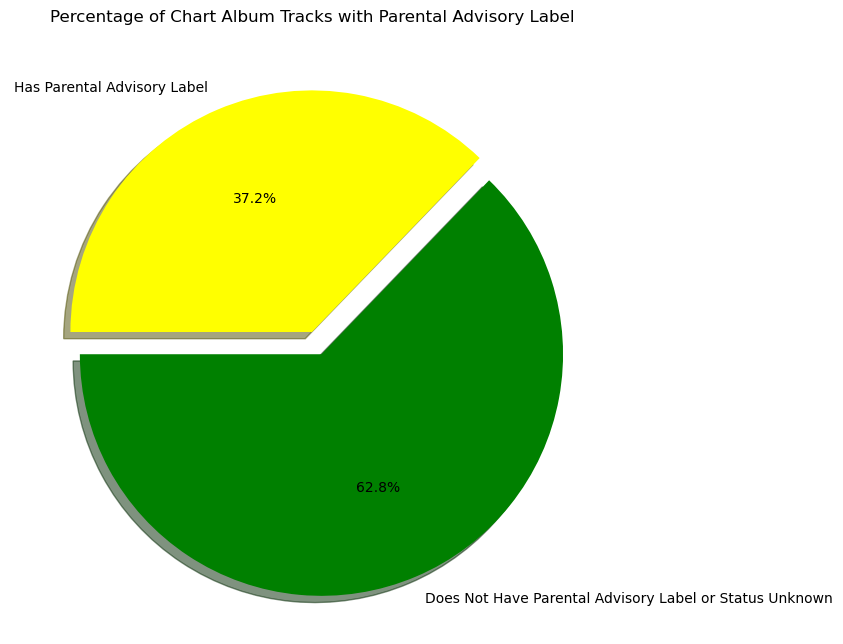

In [35]:
plt.pie(df4['track_explicit'].value_counts(), 
        explode=(0.1, 0), 
        colors=['green', 'yellow'], 
        autopct='%1.1f%%',
        shadow=True,
        startangle=180, labels = ['Does Not Have Parental Advisory Label or Status Unknown', 'Has Parental Advisory Label']);
plt.title('Percentage of Chart Album Tracks with Parental Advisory Label')
plt.savefig('../viz/pyplots/ExplicitPieChart.png')

#### Explicit Lyrics by Genre

In [62]:

explicit_by_genre = df4.groupby('main_genre')['track_explicit'].value_counts()
explicit_by_genre = explicit_by_genre.reset_index()
album_artist_chart_count.columns = ['artist_name', 'artist_chart_frequency'] # change column names
album_artist_chart_count

ValueError: cannot insert track_explicit, already exists

In [37]:
plt.bar(x, y2, bottom=y1, color='b')

NameError: name 'x' is not defined

#### Average valence for most popular album songs for each chart year: 

In [38]:
print(f"Average valence in 2017: {np.mean(df5[df5['playlist_name'] == 'Billboard 200 Top Albums 2017']['valence'])}")
print(f"Average valence in 2018: {np.mean(df5[df5['playlist_name'] == 'Billboard 200 Top Albums 2018']['valence'])}")
print(f"Average valence in 2019: {np.mean(df5[df5['playlist_name'] == 'Billboard 200 Top Albums 2019']['valence'])}")
print(f"Average valence in 2020: {np.mean(df5[df5['playlist_name'] == 'Billboard 200 Top Albums 2020']['valence'])}")
print(f"Average valence in 2021: {np.mean(df5[df5['playlist_name'] == 'Billboard 200 Top Albums 2021']['valence'])}")

Average valence in 2017: 0.4652556701030933
Average valence in 2018: 0.46066633165829146
Average valence in 2019: 0.46098544176706735
Average valence in 2020: 0.4796822999999993
Average valence in 2021: 0.4771957999999995


#### Mean values of each audio feature

In [39]:
df4[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']].mean()

danceability        0.624576
energy              0.601458
acousticness        0.262261
instrumentalness    0.029719
liveness            0.189858
valence             0.454809
dtype: float64

#### Bar plot of audio feature means of most popular tracks per album

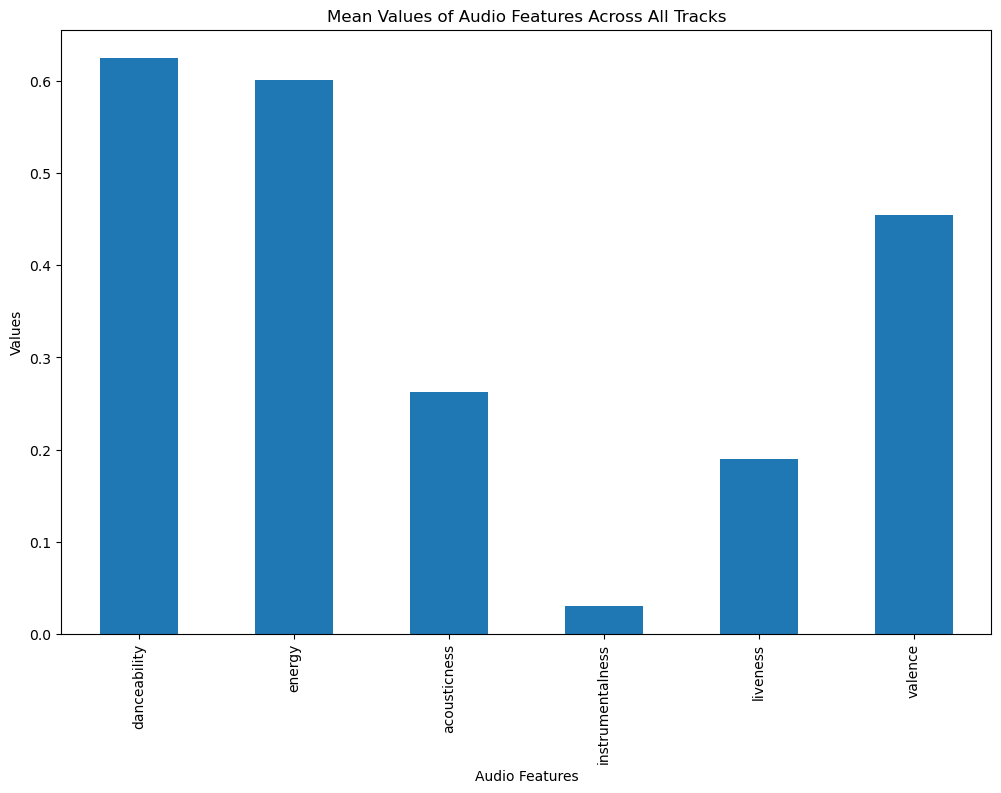

In [41]:
feature_bars = df4[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
feature_bars.mean().plot.bar()
plt.title('Mean Values of Audio Features Across All Tracks')
plt.xlabel('Audio Features')
plt.ylabel('Values')
plt.savefig('../viz/pyplots/MeanAudioFeaturesBarPlot.png')

#### Histograms of audio features

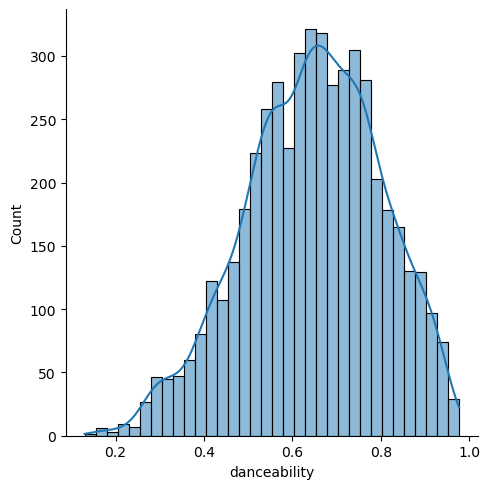

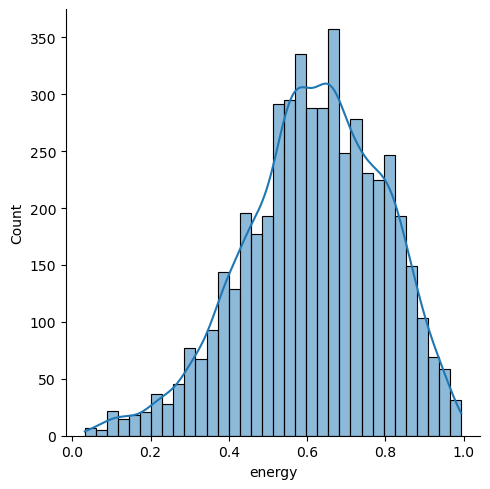

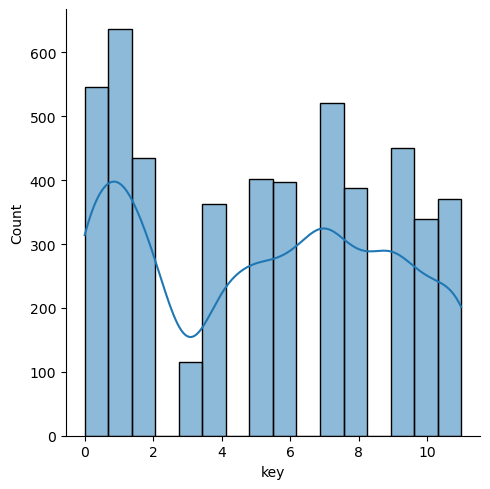

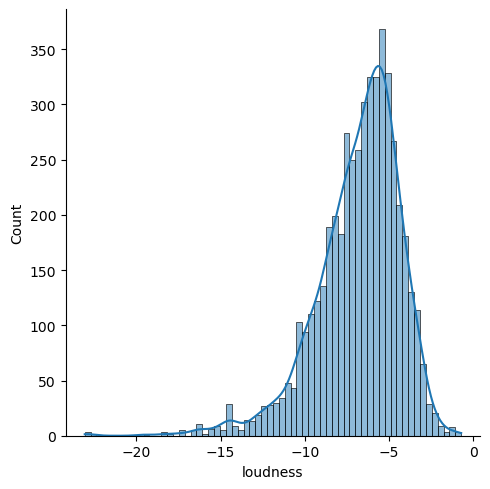

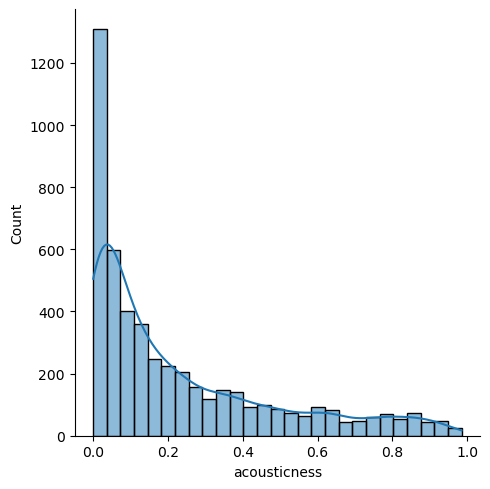

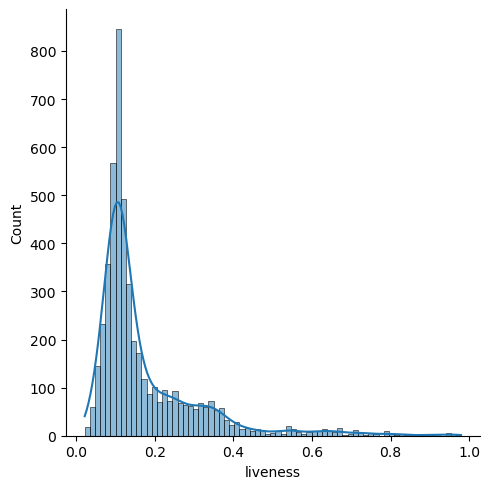

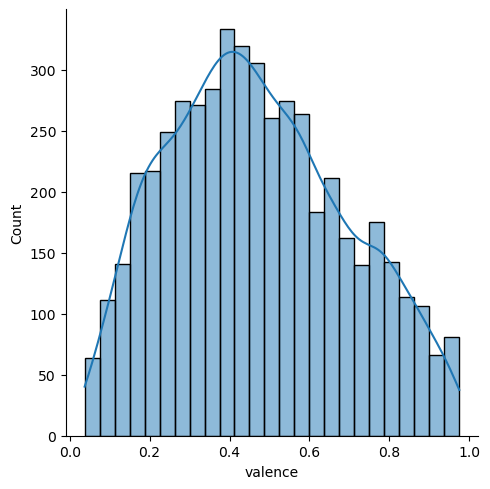

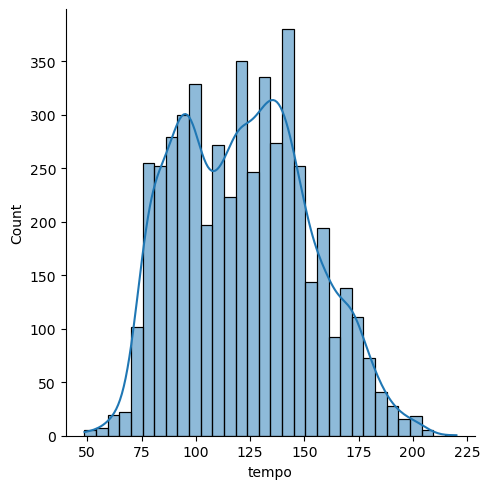

In [42]:
features = ['danceability', 'energy', 'key', 'loudness', 'acousticness', 'liveness', 'valence','tempo']
for col in features:
  sns.displot(df5, x=col, kde=True)
  plt.show()

#### Correlation Heatmap of Features

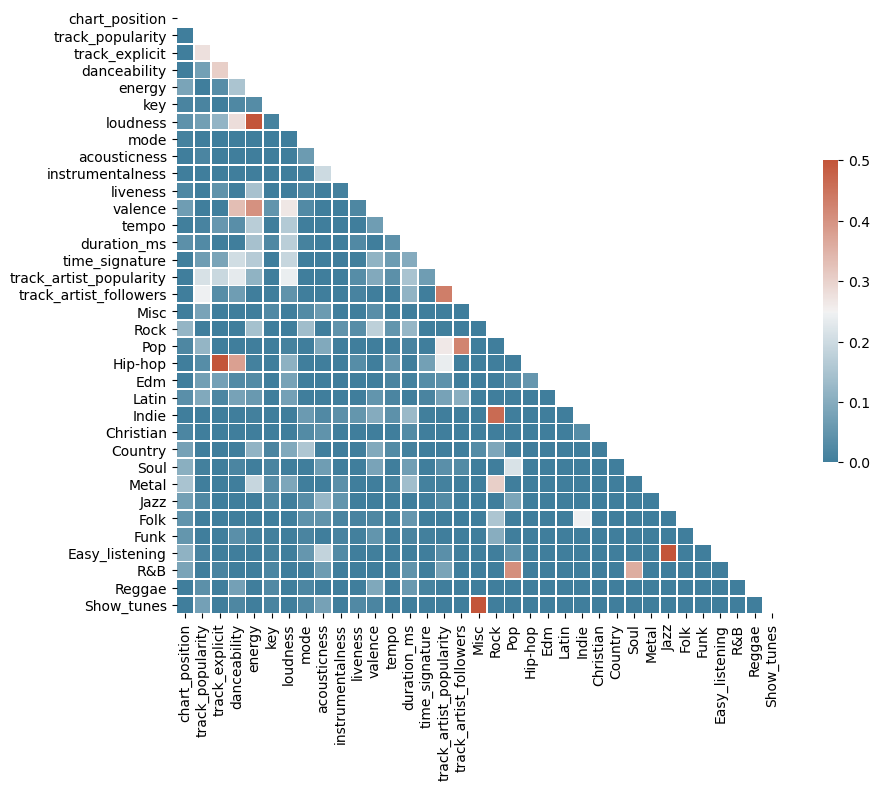

In [43]:
# Generate a mask for the upper part of the chart
mask = np.triu(np.ones_like(df4.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df4.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('../viz/pyplots/CorrHeatMapAllTracks.png')

#### Average song length

In [44]:
print(f"Average song duration in minutes for all years: {int(np.mean(df4['duration_ms']) // 60000)}:" f"{round(np.mean(df4['duration_ms'] / 10000) % 60)} \n")

Average song duration in minutes for all years: 3:21 



#### Longest song

In [45]:
print(f"Longest song in minutes: {df4.iloc[df4['duration_ms'].idxmax()]['track_name']} by "
        f"{df4.iloc[df4['duration_ms'].idxmax()]['track_artist']}, length = "
        f"{int(df4['duration_ms'].max() // 60000)}:" f"{round((df4['duration_ms'].max() / 10000) % 60)}\n")

Longest song in minutes: Like I Never Left (feat. Diddy & Ludacris, feat. Pharrell, Pusha T & Casino) by Future, length = 25:35



#### Artist that has the most appearances on charts across the entire dataset year range

In [46]:
df_freq_art = df2.dropna(subset=['album_artist'])
print(f"Most frequently appearing album artist: {df_freq_art['album_artist'].value_counts().idxmax()}" f" appears {df_freq_art['album_artist'].value_counts().max()} times.\n")

Most frequently appearing album artist: Drake appears 31 times.



#### Number of chart appearances by particular artists:

In [48]:
print("Number of chart appearances of albums by Taylor Swift: " + str(df2['album_artist'].str.contains("Taylor Swift").sum()))
print("Number of chart appearances of albums by Queen: " + str(df2['album_artist'].str.contains("Queen").sum()))
print("Number of chart appearances of albums by Elton John: " + str(df2['album_artist'].str.contains("Elton John").sum()))

Number of chart appearances of albums by Taylor Swift: 15
Number of chart appearances of albums by Queen: 7
Number of chart appearances of albums by Elton John: 4


#### Create word cloud viz of artist chart appearance frequency

Create df of artist frequencies

In [49]:
album_artist_chart_count = df2['album_artist'].value_counts()
album_artist_chart_count = album_artist_chart_count.reset_index()
album_artist_chart_count.columns = ['artist_name', 'artist_chart_frequency'] # change column names
album_artist_chart_count

,artist_name,artist_chart_frequency
0,Drake,31
1,Post Malone,16
2,The Weeknd,16
3,Taylor Swift,15
4,Eminem,13
...,...,...
290,BlocBoy JB,1
291,Shelley FKA DRAM,1
292,Anuel AA,1
293,AJR,1


Convert df to dict

In [50]:
artist_freq = dict(zip(album_artist_chart_count['artist_name'].tolist(), album_artist_chart_count['artist_chart_frequency'].tolist()))

Plot word cloud

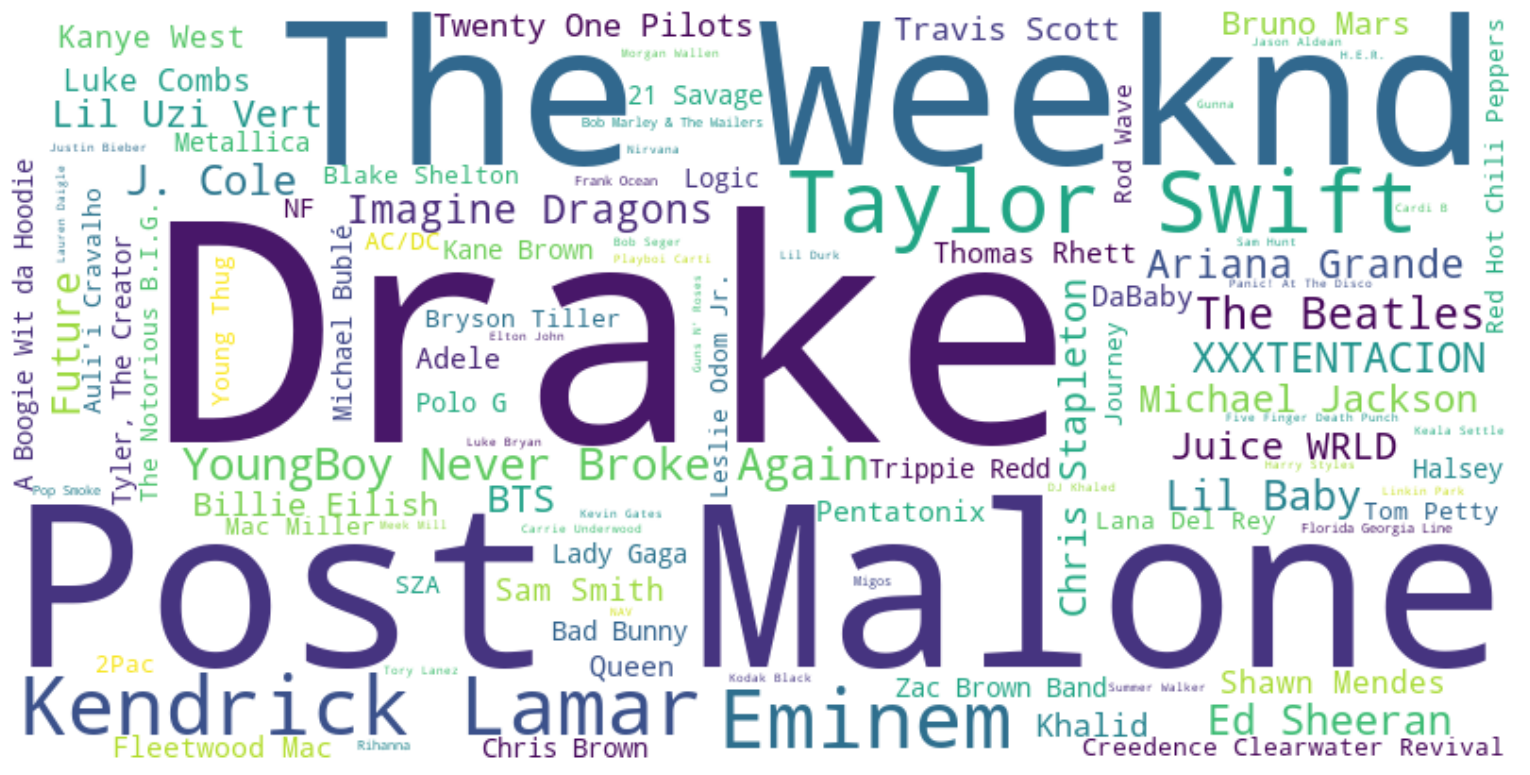

In [51]:
wc_white = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc_white, interpolation='bilinear')
plt.axis('off')
plt.show()
# Plot visualizations must be saved manually as png, but can be exported to svg with the following:
# wordcloud_svg = wc_white.to_svg(embed_font=True)
# f = open("../viz/pyplots/ArtistChartAppearanceWordCloudWhite.svg","w+")
# f.write(wordcloud_svg )
# f.close()

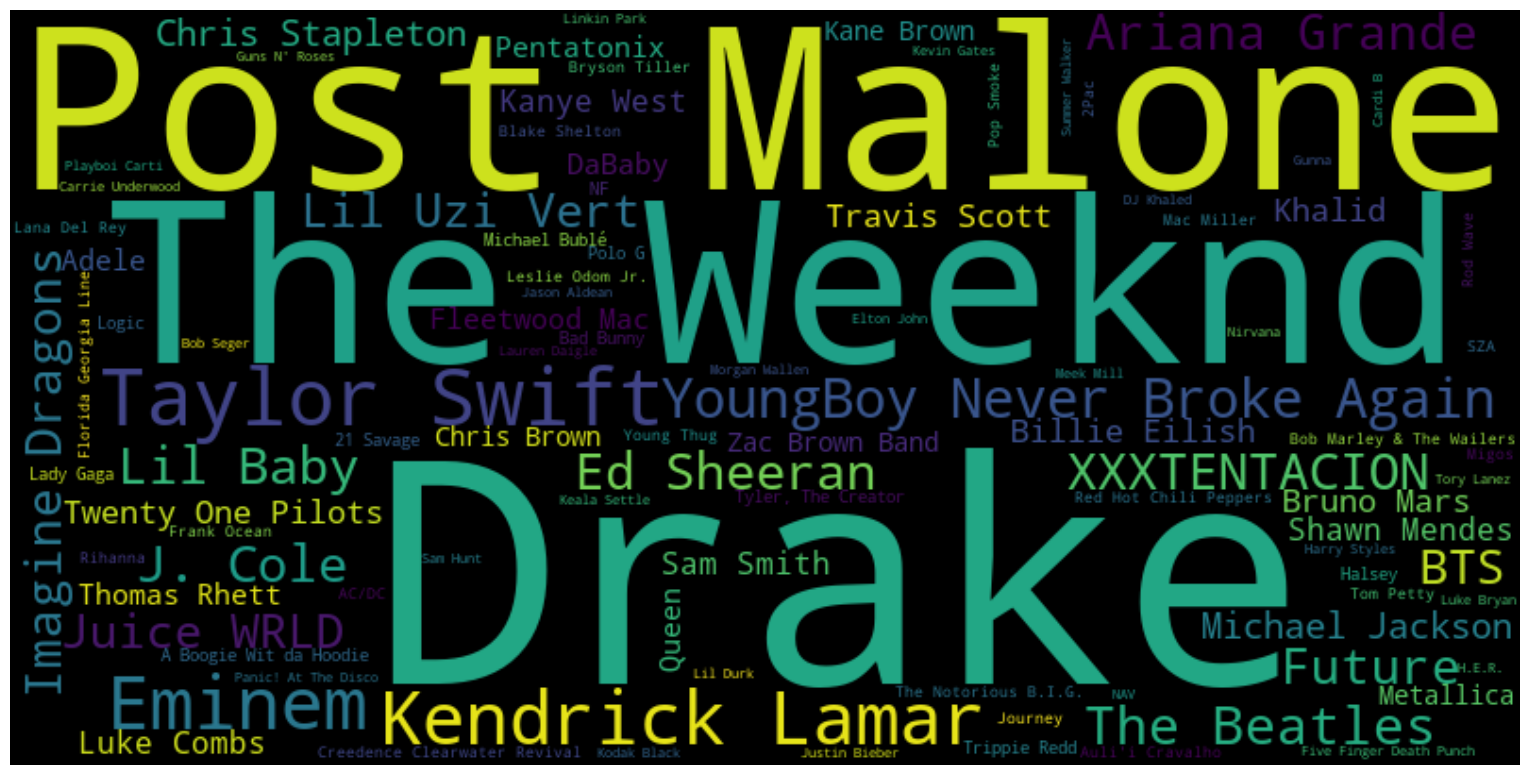

In [52]:
wc_black = WordCloud(background_color='black',width=800, height=400, max_words=100).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc_black, interpolation='bilinear')
plt.axis('off')
plt.show()
# Plot visualizations must be saved manually as png, but can be exported to svg with the following:
# wordcloud_svg = wc_black.to_svg(embed_font=True)
# f = open("../viz/pyplots/ArtistChartAppearanceWordCloudBlack.svg","w+")
# f.write(wordcloud_svg )
# f.close()

#### Queen songs appearances on all charts

In [53]:
df2.loc[df2['album_artist'] == "Queen"]

,Unnamed: 0,playlist_id,playlist_name,position,album_name,album_id,album_release_date,album_artists,album_artists_ids,album_artists_genres,album_artists_popularity,album_artists_followers,track_name,track_id,track_popularity,track_artists,track_artists_ids,track_artists_genres,track_artists_popularity,track_explicit,track_artists_followers,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,album_artist,chart_position
22,22,3avCwQPH6DkhMTRsizon7N,Billboard 200 Top Albums 2021,23,Greatest Hits,6a8nlV9V8kPUbTTCJNVSsh,2014,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],[38849077],Bohemian Rhapsody - Remastered 2011,6ljkRMigoNtu0x1mlTEsKc,36,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],False,[38849077],0.393,0.398,0,-9.973,0,0.256,0.0,0.195,0.2360,143.353,355467,4,Queen,23
224,224,1EEazdcjH0keT4sttGvH8c,Billboard 200 Top Albums 2020,25,Greatest Hits,6a8nlV9V8kPUbTTCJNVSsh,2014,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],[38849077],Bohemian Rhapsody - Remastered 2011,6ljkRMigoNtu0x1mlTEsKc,36,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],False,[38849077],0.393,0.398,0,-9.973,0,0.256,0.0,0.195,0.2360,143.353,355467,4,Queen,25
411,411,0n3V7u9sMRV7sCDMhWxDtL,Billboard 200 Top Albums 2019,12,Bohemian Rhapsody (The Original Soundtrack),3BHe7LbW5yRjyqXNJ3A6mW,2018-10-19,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],[38849077],The Show Must Go On - 2011 Remaster,0LCWyLFPXIeg1CIC1NS712,41,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],False,[38849077],0.425,0.675,11,-6.790,0,0.433,4.51e-06,0.112,0.0671,84.156,271612,4,Queen,12
426,426,0n3V7u9sMRV7sCDMhWxDtL,Billboard 200 Top Albums 2019,27,Greatest Hits,6a8nlV9V8kPUbTTCJNVSsh,2014,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],[38849077],Bohemian Rhapsody - Remastered 2011,6ljkRMigoNtu0x1mlTEsKc,36,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],False,[38849077],0.393,0.398,0,-9.973,0,0.256,0.0,0.195,0.2360,143.353,355467,4,Queen,27
479,479,0n3V7u9sMRV7sCDMhWxDtL,Billboard 200 Top Albums 2019,80,The Platinum Collection (Greatest Hits I II & ...,60Yx1xATvlWpAMzsBMMTSE,2011,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],[38849077],Bohemian Rhapsody - Remastered 2011,4q0ga6PujERMThC4FXO4WV,31,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[89],False,[38849077],0.392,0.398,0,-9.973,0,0.256,0.0,0.195,0.2360,143.587,355467,4,Queen,80
695,695,34KSLHLGSNqeK6UfxKnLuM,Billboard 200 Top Albums 2018,96,Greatest Hits,6a8nlV9V8kPUbTTCJNVSsh,2014,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[90],[38849077],Bohemian Rhapsody - Remastered 2011,6ljkRMigoNtu0x1mlTEsKc,36,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[90],False,[38849077],0.393,0.398,0,-9.973,0,0.256,0.0,0.195,0.2360,143.353,355467,4,Queen,96
932,932,1N9WQ0C6m7n1TVeLXdUoNb,Billboard 200 Top Albums 2017,135,The Platinum Collection (Greatest Hits I II & ...,60Yx1xATvlWpAMzsBMMTSE,2011,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[90],[38849077],Bohemian Rhapsody - Remastered 2011,4q0ga6PujERMThC4FXO4WV,31,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],"[['classic rock', 'glam rock', 'rock']]",[90],False,[38849077],0.392,0.398,0,-9.973,0,0.256,0.0,0.195,0.2360,143.587,355467,4,Queen,135


#### Most popular Taylor Swift song on all charts

In [54]:
print("Most popular Taylor Swift song: " + str(df4.iloc[df4[df4['track_artist'].str.contains('Taylor Swift')]['track_popularity'].idxmax]['track_name']) + "\n")

Most popular Taylor Swift song: Lover



#### Oldest track

Wrangle release date format

In [55]:
album_release_frame = df4[['album_release_date', 'track_name', 'track_artist']]
album_release_frame['datum'] = pd.to_datetime(album_release_frame['album_release_date'], format='%Y-%m-%d')
album_release_frame['year'] = album_release_frame['datum'].dt.year
album_release_frame

<ipython-input-55-62230f4b33c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_release_frame['datum'] = pd.to_datetime(album_release_frame['album_release_date'], format='%Y-%m-%d')
<ipython-input-55-62230f4b33c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_release_frame['year'] = album_release_frame['datum'].dt.year


,album_release_date,track_name,track_artist,datum,year
0,2021-01-08,Sand In My Boots,Morgan Wallen,2021-01-08,2021
1,2021-01-08,Wasted On You,Morgan Wallen,2021-01-08,2021
2,2021-01-08,Somebody’s Problem,Morgan Wallen,2021-01-08,2021
3,2021-01-08,More Surprised Than Me,Morgan Wallen,2021-01-08,2021
4,2021-01-08,865,Morgan Wallen,2021-01-08,2021
...,...,...,...,...,...
16500,2017-06-09,Big Love In A Small Town,Lady A,2017-06-09,2017
16501,2017-06-09,The Stars,Lady A,2017-06-09,2017
16502,2017-06-09,Teenage Heart,Lady A,2017-06-09,2017
16503,2017-06-09,Home,Lady A,2017-06-09,2017


In [56]:
print(f" The oldest track present on the charts is {album_release_frame.loc[album_release_frame['year'].idxmin()]['track_name']} released in {df2['album_release_date'].min()}.\n")

 The oldest track present on the charts is The Christmas Song (Merry Christmas To You) released in 1962.



In [57]:
print(f" The newest track present on the charts is {album_release_frame.loc[album_release_frame['datum'].idxmax()]['track_name']} released by {album_release_frame.loc[album_release_frame['datum'].idxmax()]['track_artist']} on {album_release_frame.loc[album_release_frame['datum'].idxmax()]['datum']}.\n")

 The newest track present on the charts is Bad Morning released by YoungBoy Never Broke Again on 2021-10-05 00:00:00.



#### Bar chart of songs by release year

In [58]:
# grouping the songs by year to get the sum
release_year = album_release_frame.groupby('year', as_index=False)['track_name'].count()

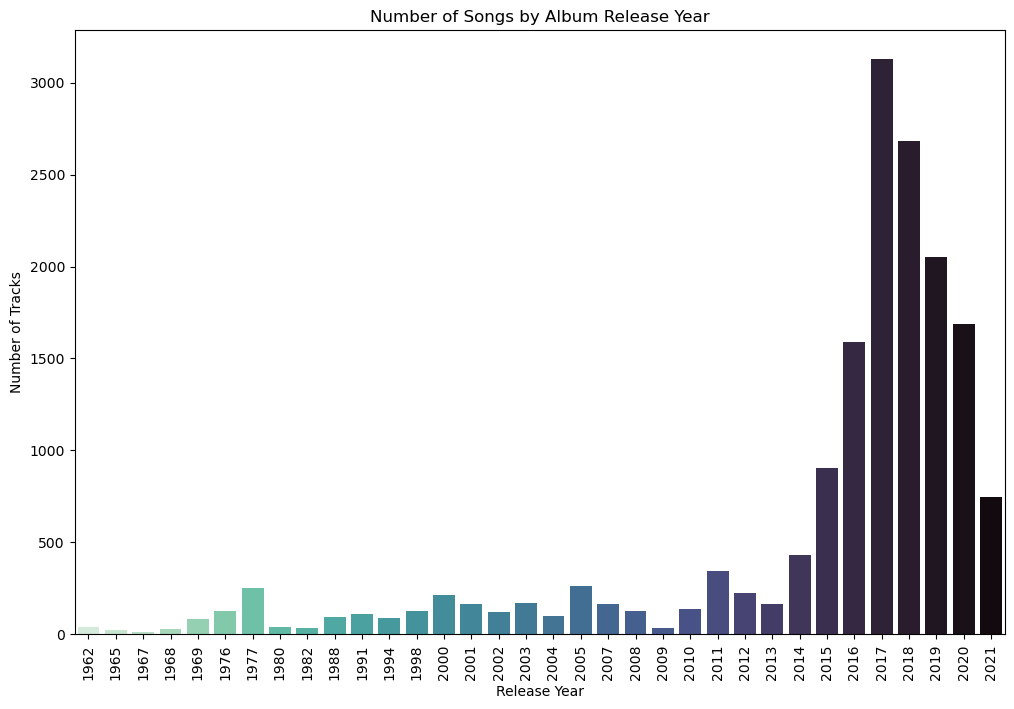

<Figure size 1200x800 with 0 Axes>

In [59]:
sns.barplot(data=release_year, x='year', y='track_name', palette='mako_r')
plt.xticks(rotation=90)
plt.title('Number of Songs by Album Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Tracks')
plt.show()
plt.savefig('../viz/pyplots/TracksPerReleaseYearBarChart.png')